In [1]:
import pandas as pd

file_path = r"C:\Users\Chris\OneDrive - Stellenbosch University\Documents\University\4th Year\Semester 2\Machin Learning 742\Projects\Assignment 1\DryBeanDataSet.xlsx"

df = pd.read_excel(file_path)
print(df.shape)
df.drop(df[df['ConvexArea'] == -30].index, inplace=True)
top_2_max_indices = df['EquivDiameter'].nlargest(2).index



df.drop(top_2_max_indices, inplace=True)
df.drop(df['EquivDiameter'].idxmin(), inplace=True)
print(df.shape)

(13611, 22)
(13607, 22)


In [2]:
second_smallest_value = df['EquivDiameter'].nsmallest(2).iloc[-1]
second_smallest_value

161.748342078731

## Handling missing values

In [3]:
import numpy as np

df.replace('?', np.nan, inplace=True)

df = df.apply(pd.to_numeric, errors='ignore')

missing_values = df.isnull().sum()
print("Missing values before filling:")
print(missing_values)

Missing values before filling:
Area                0
Perimeter           0
MajorAxisLength     0
MinorAxisLength     0
AspectRation        0
Eccentricity        0
ConvexArea          0
Constantness        0
EquivDiameter       0
Colour              6
Extent              6
Solidity            0
roundness           0
Compactness        18
ShapeFactor1        0
ShapeFactor2        0
ShapeFactor3        0
ShapeFactor4        0
ShapeFactor5        0
ShapeFactor6        5
Class              17
Sort order          0
dtype: int64


C:\Users\Chris\AppData\Local\Temp\ipykernel_21264\4100525248.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('?', np.nan, inplace=True)
C:\Users\Chris\AppData\Local\Temp\ipykernel_21264\4100525248.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [4]:
updates = {
    3200: 'BOMBAY',
    1354: 'DERMASON',
    6952: 'DERMASON',
    1772: 'SEKER',
    3141: 'SEKER',
    2629: 'SIRA',
    118: 'SIRA',
    2950: 'SIRA'
}

for index, new_class in updates.items():
    df.at[index, 'Class'] = new_class

for index in updates.keys():
    print(f"Index {index}: Class = {df.at[index, 'Class']}")


Index 3200: Class = BOMBAY
Index 1354: Class = DERMASON
Index 6952: Class = DERMASON
Index 1772: Class = SEKER
Index 3141: Class = SEKER
Index 2629: Class = SIRA
Index 118: Class = SIRA
Index 2950: Class = SIRA


In [5]:
df['Class'].isnull().sum()

9

## Drop the following entries with wich colours are incorrect:


In [6]:
dermason_brown = df[(df['Colour'] == 'brown') & (df['Class'] == 'DERMASON')]

seker_brown = df[(df['Colour'] == 'brown') & (df['Class'] == 'SEKER')]

dermason_brown,seker_brown

(       Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
 1354  24754    590.086       223.247005       141.526322      1.577424   
 6952  30462    644.916       243.284158       160.068627      1.519874   
 
       Eccentricity  ConvexArea  Constantness  EquivDiameter Colour  ...  \
 1354      0.773378       25100             1     177.532452  brown  ...   
 6952      0.753062       30719             1     196.940151  brown  ...   
 
       roundness  Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  \
 1354   0.893356     0.795229      0.009019      0.002225      0.632389   
 6952   0.920369     0.809507      0.007986      0.002116      0.655301   
 
       ShapeFactor4  ShapeFactor5  ShapeFactor6     Class  Sort order  
 1354      3.165194      0.997545     50.839800  DERMASON    0.462143  
 6952      2.112381      0.995975      4.221826  DERMASON    0.145179  
 
 [2 rows x 22 columns],
        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \

In [7]:
indices_to_remove = [1354, 6952, 1772, 3141]

df = df.drop(indices_to_remove)

dermason_brown = df[(df['Colour'] == 'brown') & (df['Class'] == 'DERMASON')]

seker_brown = df[(df['Colour'] == 'brown') & (df['Class'] == 'SEKER')]

print(dermason_brown)
print(seker_brown)

Empty DataFrame
Columns: [Area, Perimeter, MajorAxisLength, MinorAxisLength, AspectRation, Eccentricity, ConvexArea, Constantness, EquivDiameter, Colour, Extent, Solidity, roundness, Compactness, ShapeFactor1, ShapeFactor2, ShapeFactor3, ShapeFactor4, ShapeFactor5, ShapeFactor6, Class, Sort order]
Index: []

[0 rows x 22 columns]
Empty DataFrame
Columns: [Area, Perimeter, MajorAxisLength, MinorAxisLength, AspectRation, Eccentricity, ConvexArea, Constantness, EquivDiameter, Colour, Extent, Solidity, roundness, Compactness, ShapeFactor1, ShapeFactor2, ShapeFactor3, ShapeFactor4, ShapeFactor5, ShapeFactor6, Class, Sort order]
Index: []

[0 rows x 22 columns]


----

# Handling Data Quality issues reagrding the decsion tree:

### Missing values

- Keep missing values exept handle Colour missing values


* Impute missing colour values uisng KNN imputer

In [8]:
df['Colour'].unique() 

array(['brown', 'black', 'green', 'white', nan], dtype=object)

In [9]:
missing_colour_rows = df[df['Colour'].isnull()]
missing_class_labels = missing_colour_rows['Class']
print("Class labels for missing Colour values:")
print(missing_class_labels)

Class labels for missing Colour values:
1175       SEKER
2316        CALI
2317       SEKER
3003       HOROZ
3149      BOMBAY
3156    DERMASON
Name: Class, dtype: object


## Impute using the grid

In [10]:
impute_values = {
    1175: 'green',
    2316: 'brown',
    2317: 'green',
    3003: 'white',
    3149: 'brown',
    3156: 'black'
}
for index, colour in impute_values.items():
    if index in df.index:
        df.at[index, 'Colour'] = colour


Updated dataframe with imputed Colour values:


In [11]:
missing_colour_rows = df[df['Colour'].isnull()]
missing_class_labels = missing_colour_rows['Class']
print("Class labels for missing Colour values:")
print(missing_class_labels)

Class labels for missing Colour values:
Series([], Name: Class, dtype: object)


* imputed Colour Class

* Drop missing class labels

In [12]:
df.dropna(subset=['Class'], inplace=True)

print("Updated dataframe after dropping rows with missing Class labels:")


Updated dataframe after dropping rows with missing Class labels:


In [13]:
missing_values = df.isnull().sum()
print("Missing values before filling:")
print(missing_values)

Missing values before filling:
Area                0
Perimeter           0
MajorAxisLength     0
MinorAxisLength     0
AspectRation        0
Eccentricity        0
ConvexArea          0
Constantness        0
EquivDiameter       0
Colour              0
Extent              6
Solidity            0
roundness           0
Compactness        18
ShapeFactor1        0
ShapeFactor2        0
ShapeFactor3        0
ShapeFactor4        0
ShapeFactor5        0
ShapeFactor6        5
Class               0
Sort order          0
dtype: int64


* Missing values in numerical Feteature kept
* Missing values in Colour feature imputer using grid
* Missing value for class labels imputed using 2 and 3D PCA through visual inspection
* Rest of missing values for Class label dropped

## Class imbalance

In [14]:
df['Class'].unique()

array(['CALI', 'DERMASON', 'SEKER', 'BOMBAY', 'SIRA', 'HOROZ', 'BARBUNYA'],
      dtype=object)

###  SMOTE

In [15]:

df = pd.get_dummies(df, columns=['Colour'])

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

X = df.drop(columns=['Class'])  
y = df['Class']
scaler = StandardScaler()

X_scaled = X.copy()
X_scaled.loc[:, :] = scaler.fit_transform(X_scaled)

X_scaled[X.isna()] = np.nan

df_missing = pd.concat([X_scaled, y], axis=1)[X_scaled.isna().any(axis=1)]

df_without_na = pd.concat([X_scaled, y], axis=1).dropna()

X = df_without_na.drop(columns=['Class'])
y = df_without_na['Class']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

smote =SMOTE(sampling_strategy='auto', random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

tomek = TomekLinks(sampling_strategy='auto')
X_train_final, y_train_final = tomek.fit_resample(X_train_resampled, y_train_resampled)

X_missing = df_missing.drop(columns=['Class'])
y_missing = df_missing['Class']

X_missing_train, X_missing_temp, y_missing_train, y_missing_temp = train_test_split(
    X_missing, y_missing, test_size=0.4, random_state=42
)
X_missing_val, X_missing_test, y_missing_val, y_missing_test = train_test_split(
    X_missing_temp, y_missing_temp, test_size=0.5, random_state=42
)


X_train_final_combined = pd.concat([pd.DataFrame(X_train_final, columns=X.columns), X_missing_train], ignore_index=True)
y_train_final_combined = pd.concat([pd.Series(y_train_final), y_missing_train], ignore_index=True)

X_val_final_combined = pd.concat([X_val, X_missing_val], ignore_index=True)
y_val_final_combined = pd.concat([y_val, y_missing_val], ignore_index=True)

X_test_final_combined = pd.concat([X_test, X_missing_test], ignore_index=True)
y_test_final_combined = pd.concat([y_test, y_missing_test], ignore_index=True)

print("X_train head:\n", X_train_final_combined.head())
print("y_train head:\n", y_train_final_combined.head())
print("X_val head:\n", X_val_final_combined.head())
print("y_val head:\n", y_val_final_combined.head())
print("X_test head:\n", X_test_final_combined.head())
print("y_test head:\n", y_test_final_combined.head())


C:\Users\Chris\AppData\Local\Temp\ipykernel_21264\446155078.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.07730963 -0.45492532 -0.58682762 ...  0.09290049  0.38138777
 -0.4748351 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_scaled.loc[:, :] = scaler.fit_transform(X_scaled)
C:\Users\Chris\AppData\Local\Temp\ipykernel_21264\446155078.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.10838445 -0.45870998 -0.59019375 ...  0.11010168  0.37773628
 -0.47764687]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_scaled.loc[:, :] = scaler.fit_transform(X_scaled)
C:\Users\Chris\AppData\Local\Temp\ipykernel_21264\446155078.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0

X_train head:
        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0 -0.377945  -0.463443        -0.388208        -0.348594     -0.185770   
1 -0.403787  -0.456673        -0.402579        -0.393924     -0.143991   
2 -0.606806  -0.694725        -0.554005        -0.822338      0.268974   
3  0.020421   0.090450         0.076282         0.169731     -0.109054   
4 -0.654705  -0.865252        -0.944762        -0.487552     -1.041883   

   Eccentricity  ConvexArea  Constantness  EquivDiameter    Extent  ...  \
0      0.094240   -0.383399       0.32794      -0.370323  0.305110  ...   
1      0.134317   -0.409085       0.32794      -0.405759 -1.009793  ...   
2      0.482737   -0.606545       0.32794      -0.696329  0.038266  ...   
3      0.167076    0.012798       0.32794       0.140101 -0.005976  ...   
4     -1.021976   -0.656943       0.32794      -0.768393  0.286561  ...   

   ShapeFactor2  ShapeFactor3  ShapeFactor4  ShapeFactor5  ShapeFactor6  \
0      0.10319

In [17]:
print("X_train:\n", X_train_final_combined.shape)
print("y_train:\n", y_train_final_combined.shape)
print("X_val:\n", X_val_final_combined.shape)
print("y_val:\n", y_val_final_combined.shape)
print("X_test:\n", X_test_final_combined.shape)
print("y_test:\n", y_test_final_combined.shape)

X_train:
 (14854, 24)
y_train:
 (14854,)
X_val:
 (2719, 24)
y_val:
 (2719,)
X_test:
 (2719, 24)
y_test:
 (2719,)


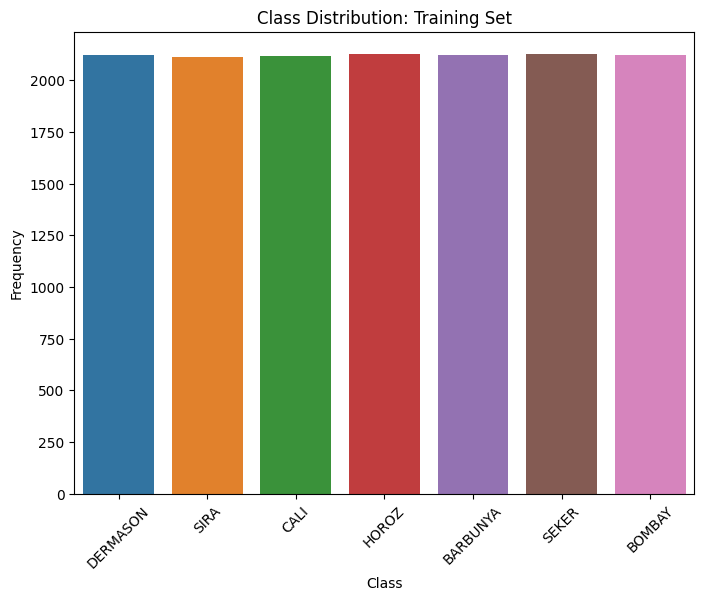

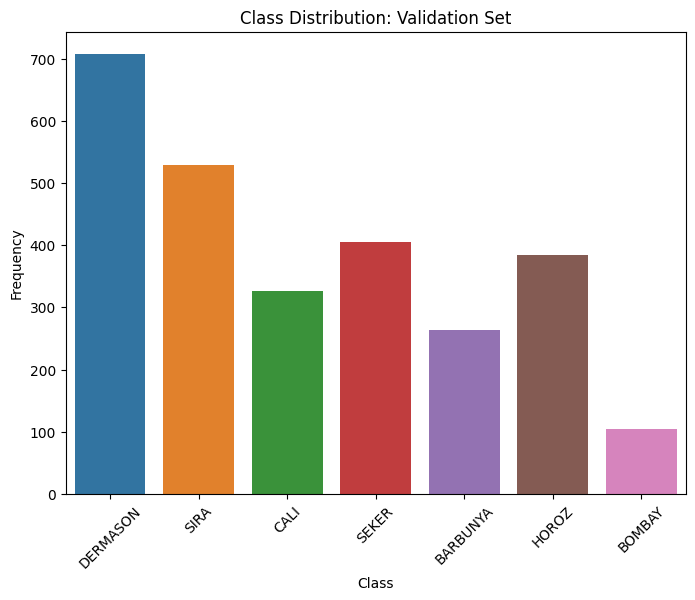

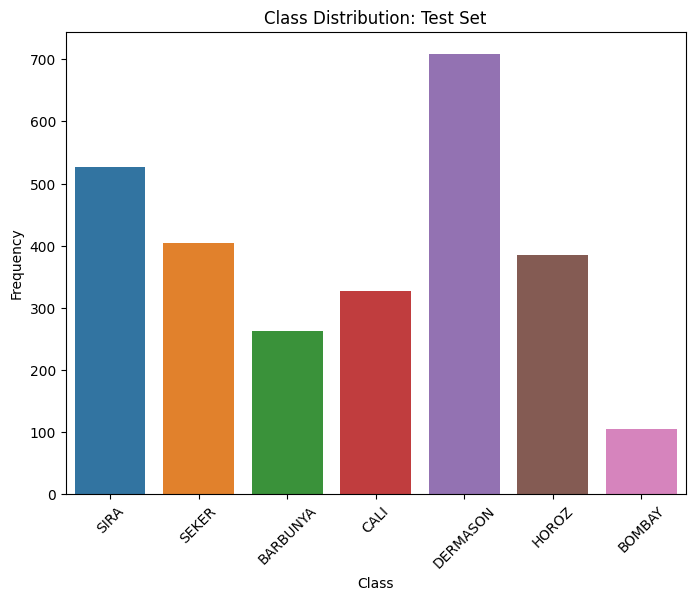

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_class_distribution(y_data, title):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=y_data)
    plt.title(f'Class Distribution: {title}')
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

plot_class_distribution(y_train_final_combined, "Training Set")
plot_class_distribution(y_val_final_combined, "Validation Set")
plot_class_distribution(y_test_final_combined, "Test Set")


---

In [19]:
value_counts = y_train.value_counts()
print(value_counts)


Class
DERMASON    2121
SIRA        1580
SEKER       1211
HOROZ       1151
CALI         974
BARBUNYA     790
BOMBAY       312
Name: count, dtype: int64


In [20]:
y_test.value_counts()

Class
DERMASON    707
SIRA        526
SEKER       404
HOROZ       384
CALI        325
BARBUNYA    263
BOMBAY      104
Name: count, dtype: int64

---

## Training the Decision tree classifier

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
y_test.value_counts()

Class
DERMASON    707
SIRA        526
SEKER       404
HOROZ       384
CALI        325
BARBUNYA    263
BOMBAY      104
Name: count, dtype: int64

100%|██████████| 48/48 [09:23<00:00, 11.74s/it]


Best parameters found: {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Accuracy of best Decision Tree classifier on validation set: 0.9808

Confusion Matrix:
[[232   0  24   0   0   0   7]
 [  0 104   0   0   0   0   0]
 [ 10   0 311   0   0   0   4]
 [  0   0   0 707   0   0   0]
 [  0   0   0   0 383   0   0]
 [  0   0   0   0   0 404   0]
 [  4   0   3   0   0   0 520]]

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.88      0.91       263
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.92      0.96      0.94       325
    DERMASON       1.00      1.00      1.00       707
       HOROZ       1.00      1.00      1.00       383
       SEKER       1.00      1.00      1.00       404
        SIRA       0.98      0.99      0.98       527

    accuracy                           0.98      2713
   macro avg  

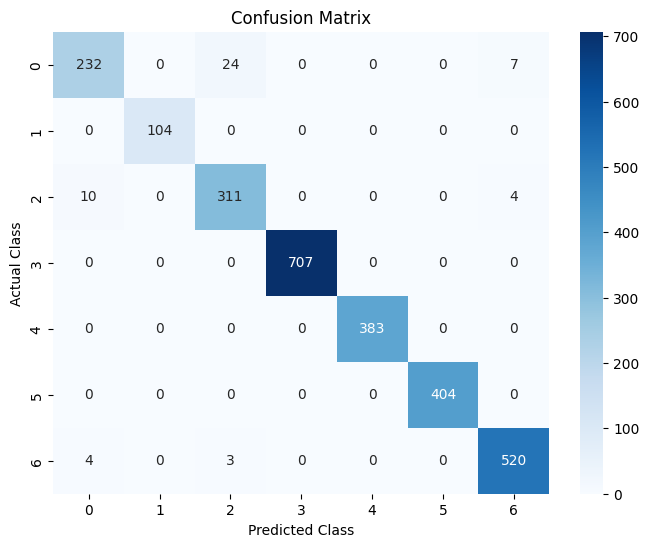

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

dt_classifier = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': [None],
    'ccp_alpha': [0.0, 0.01, 0.05, 0.1]
}

grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=0)

n_iter = len(param_grid['criterion']) * len(param_grid['splitter']) * len(param_grid['max_depth']) * len(param_grid['min_samples_split']) * len(param_grid['min_samples_leaf']) * len(param_grid['max_features']) * len(param_grid['ccp_alpha'])
with tqdm(total=n_iter) as pbar:
    for i in range(n_iter):
        grid_search.fit(X_train, y_train)
        pbar.update(1)

best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

best_dt_classifier = grid_search.best_estimator_

y_val_pred = best_dt_classifier.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy of best Decision Tree classifier on validation set: {accuracy:.4f}")

conf_matrix = confusion_matrix(y_val, y_val_pred)
class_report = classification_report(y_val, y_val_pred)

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()


---

100%|██████████| 48/48 [12:33<00:00, 15.69s/it]


Best parameters found: {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Accuracy of best Decision Tree classifier on validation set: 0.9808
F1-score of best Decision Tree classifier on validation set: 0.9808
Specificity of best Decision Tree classifier on validation set: 0.9968

Confusion Matrix:
[[232   0  24   0   0   0   7]
 [  0 104   0   0   0   0   0]
 [ 10   0 311   0   0   0   4]
 [  0   0   0 707   0   0   0]
 [  0   0   0   0 383   0   0]
 [  0   0   0   0   0 404   0]
 [  4   0   3   0   0   0 520]]

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.88      0.91       263
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.92      0.96      0.94       325
    DERMASON       1.00      1.00      1.00       707
       HOROZ       1.00      1.00      1.00       383
       SEKER       1.00      1.00     

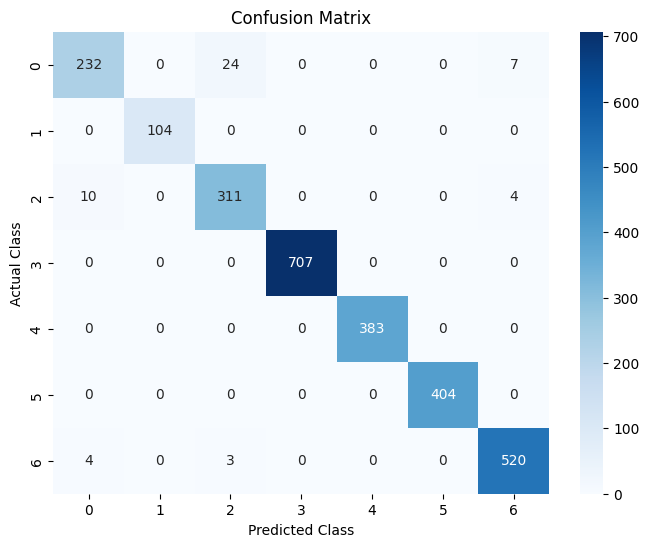

In [27]:
from sklearn.metrics import make_scorer, f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    specificity_per_class = []
    for i in range(len(cm)):
        true_negatives = np.sum(np.delete(np.delete(cm, i, axis=0), i, axis=1))  
        false_positives = np.sum(cm[:, i]) - cm[i, i] 
        if (true_negatives + false_positives) > 0:
            specificity_per_class.append(true_negatives / (true_negatives + false_positives))
        else:
            specificity_per_class.append(np.nan)
    return np.nanmean(specificity_per_class)  



dt_classifier = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': [None],
    'ccp_alpha': [0.0, 0.01, 0.05, 0.1]
}

scoring = {
    'accuracy': 'accuracy',
    'f1_micro': make_scorer(f1_score, average='micro'),
}

grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=10, scoring=scoring, n_jobs=-1, refit='accuracy', verbose=0)

n_iter = len(param_grid['criterion']) * len(param_grid['splitter']) * len(param_grid['max_depth']) * len(param_grid['min_samples_split']) * len(param_grid['min_samples_leaf']) * len(param_grid['max_features']) * len(param_grid['ccp_alpha'])
with tqdm(total=n_iter) as pbar:
    for i in range(n_iter):
        grid_search.fit(X_train, y_train)
        pbar.update(1)

best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

best_dt_classifier = grid_search.best_estimator_

y_val_pred = best_dt_classifier.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred, average='micro')
specificity = specificity_score(y_val, y_val_pred)

print(f"Accuracy of best Decision Tree classifier on validation set: {accuracy:.4f}")
print(f"F1-score of best Decision Tree classifier on validation set: {f1:.4f}")
print(f"Specificity of best Decision Tree classifier on validation set: {specificity:.4f}")

conf_matrix = confusion_matrix(y_val, y_val_pred)
class_report = classification_report(y_val, y_val_pred)

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

---

## Bootrapped CI's

Best parameters found: {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


Bootstrapping:   0%|          | 0/10000 [00:00<?, ?iteration/s]

Bootstrapping: 100%|██████████| 10000/10000 [17:11<00:00,  9.69iteration/s]


Bootstrap Mean Accuracy: 0.9800
95% Confidence Interval: [0.9760, 0.9838]


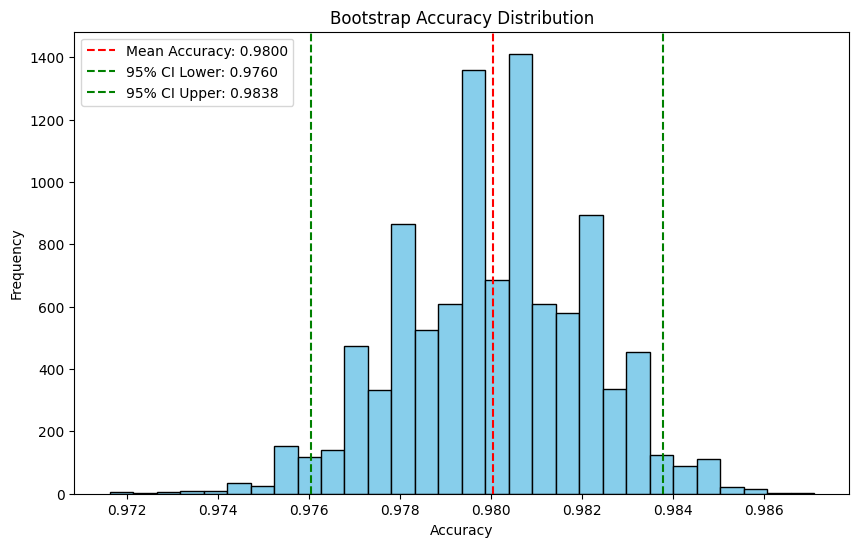

In [28]:
import numpy as np
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm
import matplotlib.pyplot as plt

best_dt_classifier = DecisionTreeClassifier(
    ccp_alpha=0.0,
    criterion='gini',
    max_depth=10,
    max_features=None,
    min_samples_leaf=1,
    min_samples_split=2,
    splitter='best',
    random_state=42
)

n_iterations = 10000
n_size = len(X_train)

bootstrap_accuracies = []

for i in tqdm(range(n_iterations), desc="Bootstrapping", unit="iteration"):
    X_train_resample, y_train_resample = resample(X_train, y_train, n_samples=n_size, random_state=i)
    
    best_dt_classifier.fit(X_train_resample, y_train_resample)
    
    y_val_pred = best_dt_classifier.predict(X_val)
    acc = accuracy_score(y_val, y_val_pred)
    
    bootstrap_accuracies.append(acc)

mean_accuracy = np.mean(bootstrap_accuracies)
confidence_interval = np.percentile(bootstrap_accuracies, [2.5, 97.5])

print(f"Bootstrap Mean Accuracy: {mean_accuracy:.4f}")
print(f"95% Confidence Interval: [{confidence_interval[0]:.4f}, {confidence_interval[1]:.4f}]")

plt.figure(figsize=(10, 6))
plt.hist(bootstrap_accuracies, bins=30, color='skyblue', edgecolor='black')
plt.title('Bootstrap Accuracy Distribution')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.axvline(mean_accuracy, color='red', linestyle='--', label=f'Mean Accuracy: {mean_accuracy:.4f}')
plt.axvline(confidence_interval[0], color='green', linestyle='--', label=f'95% CI Lower: {confidence_interval[0]:.4f}')
plt.axvline(confidence_interval[1], color='green', linestyle='--', label=f'95% CI Upper: {confidence_interval[1]:.4f}')
plt.legend()
plt.show()

Test Accuracy: 0.9805

Confusion Matrix:
[[229   1  21   0   0   0  12]
 [  0 104   0   0   0   0   0]
 [ 11   0 312   0   0   0   2]
 [  0   0   0 707   0   0   0]
 [  0   0   0   0 384   0   0]
 [  0   0   0   0   0 404   0]
 [  5   0   1   0   0   0 520]]

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.93      0.87      0.90       263
      BOMBAY       0.99      1.00      1.00       104
        CALI       0.93      0.96      0.95       325
    DERMASON       1.00      1.00      1.00       707
       HOROZ       1.00      1.00      1.00       384
       SEKER       1.00      1.00      1.00       404
        SIRA       0.97      0.99      0.98       526

    accuracy                           0.98      2713
   macro avg       0.98      0.97      0.97      2713
weighted avg       0.98      0.98      0.98      2713



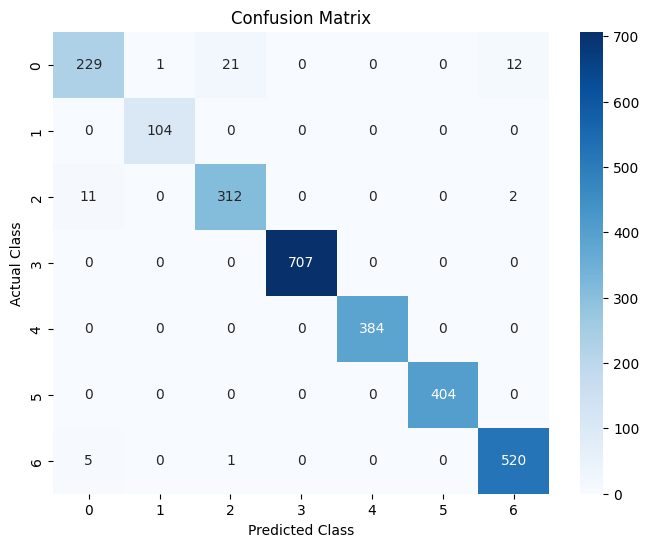

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

best_dt_classifier = DecisionTreeClassifier(
    ccp_alpha=0.0,
    criterion='gini',
    max_depth=10,
    max_features=None,
    min_samples_leaf=1,
    min_samples_split=2,
    splitter='best',
    random_state=42
)

best_dt_classifier.fit(X_train, y_train)

y_test_pred = best_dt_classifier.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()


Test Accuracy: 0.9805

Confusion Matrix:
[[229   1  21   0   0   0  12]
 [  0 104   0   0   0   0   0]
 [ 11   0 312   0   0   0   2]
 [  0   0   0 707   0   0   0]
 [  0   0   0   0 384   0   0]
 [  0   0   0   0   0 404   0]
 [  5   0   1   0   0   0 520]]

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.93      0.87      0.90       263
      BOMBAY       0.99      1.00      1.00       104
        CALI       0.93      0.96      0.95       325
    DERMASON       1.00      1.00      1.00       707
       HOROZ       1.00      1.00      1.00       384
       SEKER       1.00      1.00      1.00       404
        SIRA       0.97      0.99      0.98       526

    accuracy                           0.98      2713
   macro avg       0.98      0.97      0.97      2713
weighted avg       0.98      0.98      0.98      2713



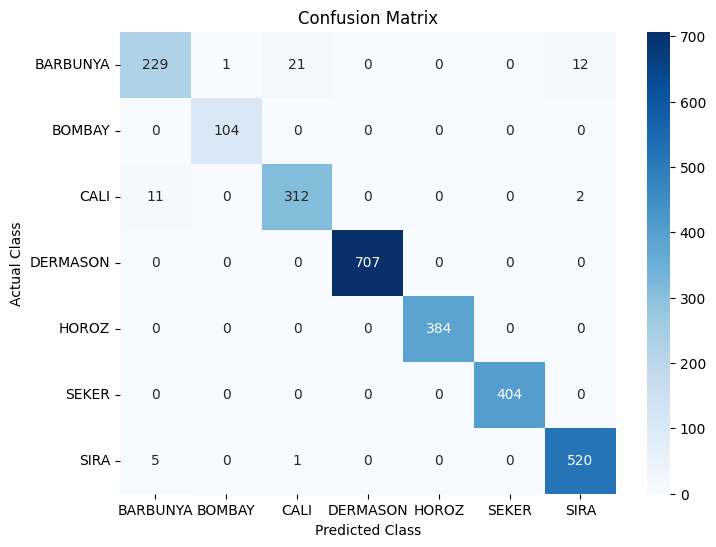

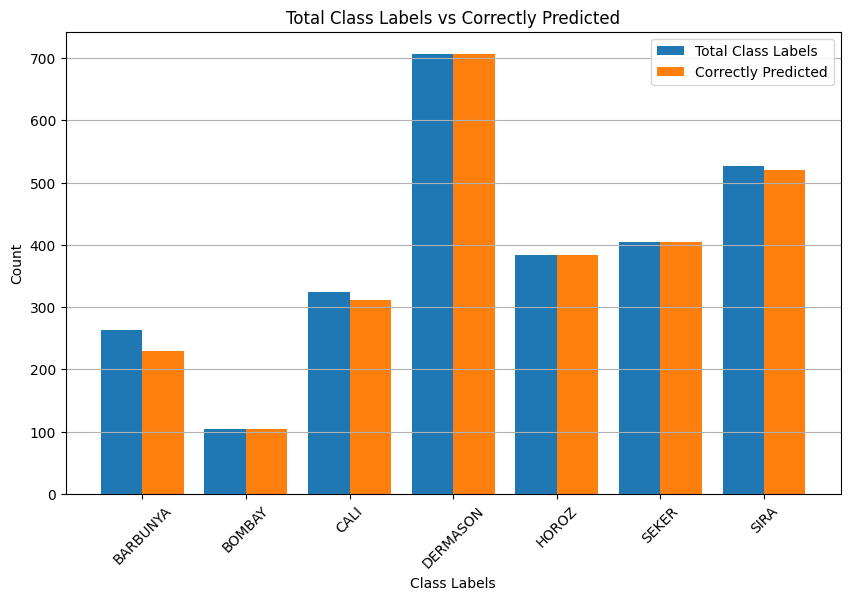


Recall Rates:
Recall for class BARBUNYA: 0.8707
Recall for class BOMBAY: 1.0000
Recall for class CALI: 0.9600
Recall for class DERMASON: 1.0000
Recall for class HOROZ: 1.0000
Recall for class SEKER: 1.0000
Recall for class SIRA: 0.9886


In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

best_dt_classifier = DecisionTreeClassifier(
    ccp_alpha=0.0,
    criterion='gini',
    max_depth=10,
    max_features=None,
    min_samples_leaf=1,
    min_samples_split=2,
    splitter='best',
    random_state=42
)

best_dt_classifier.fit(X_train, y_train_encoded)

y_test_pred_encoded = best_dt_classifier.predict(X_test)


test_accuracy = accuracy_score(y_test_encoded, y_test_pred_encoded)
print(f"Test Accuracy: {test_accuracy:.4f}")

conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_encoded)
class_report = classification_report(y_test_encoded, y_test_pred_encoded, target_names=label_encoder.classes_)

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

class_labels = label_encoder.classes_
total_per_class = np.bincount(y_test_encoded)
correctly_predicted_per_class = np.diag(conf_matrix)

bar_width = 0.4
x = np.arange(len(class_labels))

plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, total_per_class, width=bar_width, label='Total Class Labels')
plt.bar(x + bar_width/2, correctly_predicted_per_class, width=bar_width, label='Correctly Predicted')

plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Total Class Labels vs Correctly Predicted')
plt.xticks(x, class_labels, rotation=45)
plt.legend()
plt.grid(axis='y')
plt.show()

recall_per_class = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)

print("\nRecall Rates:")
for label, recall in zip(class_labels, recall_per_class):
    print(f"Recall for class {label}: {recall:.4f}")


# KNN model

## Data Quality Issues

* Leave Outliers, as robust to outliers

* Imputed the ones same as Decsion Tree

* Will keep missing values, use euclidean_nan from sklearn implementation

* Class imbalance, I use SMOTE and Tomek Links

Fitting 10 folds for each of 96 candidates, totalling 960 fits
Best parameters found: {'imputer__n_neighbors': 5, 'knn__algorithm': 'auto', 'knn__n_neighbors': 7}
Accuracy of best KNN classifier on validation set: 0.9819

Confusion Matrix:
[[236   0  22   0   0   0   5]
 [  0 104   0   0   0   0   0]
 [  9   0 308   0   0   0   8]
 [  0   0   0 707   0   0   0]
 [  0   0   0   0 383   0   0]
 [  0   0   0   0   0 404   0]
 [  1   0   4   0   0   0 522]]

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.96      0.90      0.93       263
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.92      0.95      0.93       325
    DERMASON       1.00      1.00      1.00       707
       HOROZ       1.00      1.00      1.00       383
       SEKER       1.00      1.00      1.00       404
        SIRA       0.98      0.99      0.98       527

    accuracy                           0.98      2713
   macro avg       0.98      0

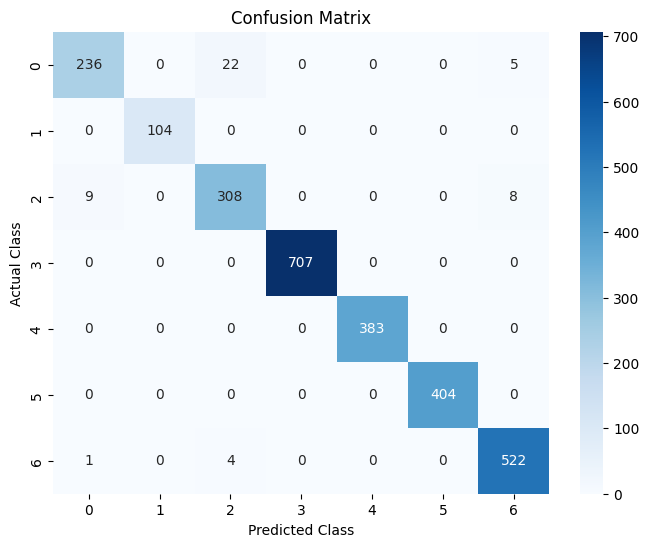

In [51]:
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
pipeline = Pipeline([
    ('imputer', KNNImputer(metric='nan_euclidean', n_neighbors=5)),
    ('knn', KNeighborsClassifier(metric='euclidean'))
])

param_grid = {
    'imputer__n_neighbors': [5, 10, 15],  
    'knn__n_neighbors': [5, 7, 9, 11, 25, 51, 91, 117], 
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

best_knn_classifier = grid_search.best_estimator_
y_val_pred = best_knn_classifier.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy of best KNN classifier on validation set: {accuracy:.4f}")

conf_matrix = confusion_matrix(y_val, y_val_pred)
class_report = classification_report(y_val, y_val_pred)

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()


Fitting 10 folds for each of 45 candidates, totalling 450 fits


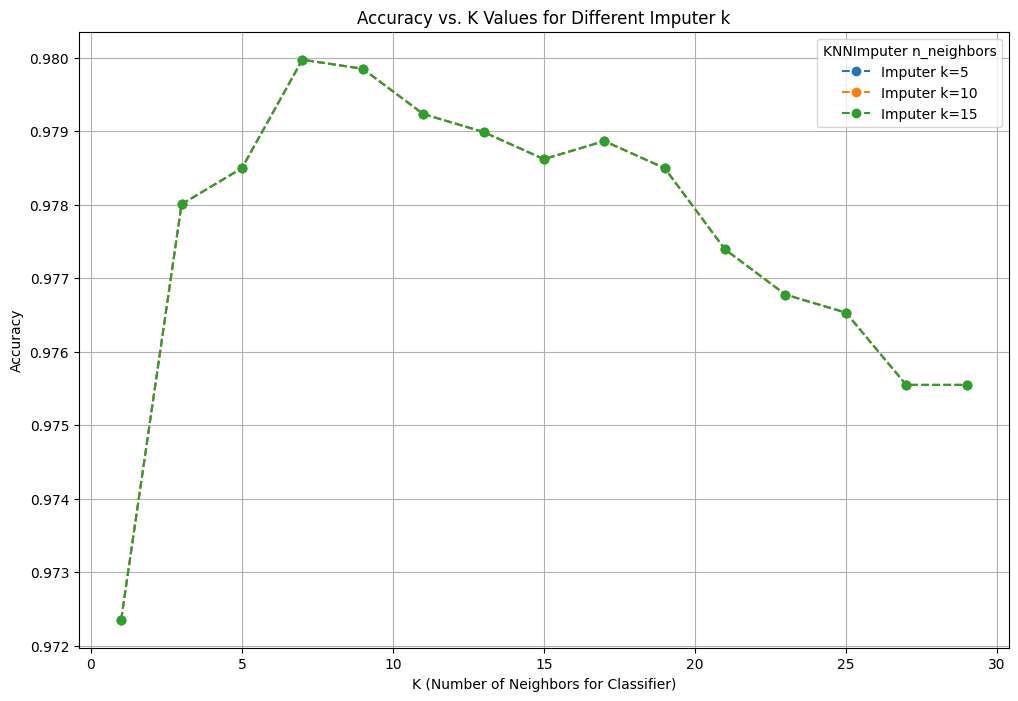

Best parameters: {'imputer__n_neighbors': 5, 'knn__n_neighbors': 7}
Best accuracy: 0.9800


In [52]:
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

k_imputer_range = [5, 10, 15] 
k_classifier_range = list(range(1, 31, 2)) 

pipeline = Pipeline([
    ('imputer', KNNImputer(metric='nan_euclidean')),
    ('knn', KNeighborsClassifier(metric='euclidean'))
])

param_grid = {
    'imputer__n_neighbors': k_imputer_range,  
    'knn__n_neighbors': k_classifier_range, 
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

grid_results = grid_search.cv_results_

mean_scores = grid_results['mean_test_score']

plt.figure(figsize=(12, 8))
for k_imputer in k_imputer_range:
    plt.plot(k_classifier_range, mean_scores[:len(k_classifier_range)], marker='o', linestyle='--', label=f'Imputer k={k_imputer}')
    mean_scores = mean_scores[len(k_classifier_range):]

plt.title('Accuracy vs. K Values for Different Imputer k')
plt.xlabel('K (Number of Neighbors for Classifier)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(title='KNNImputer n_neighbors')
plt.show()

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters: {best_params}")
print(f"Best accuracy: {best_score:.4f}")


Fitting 10 folds for each of 180 candidates, totalling 1800 fits


c:\Users\Chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


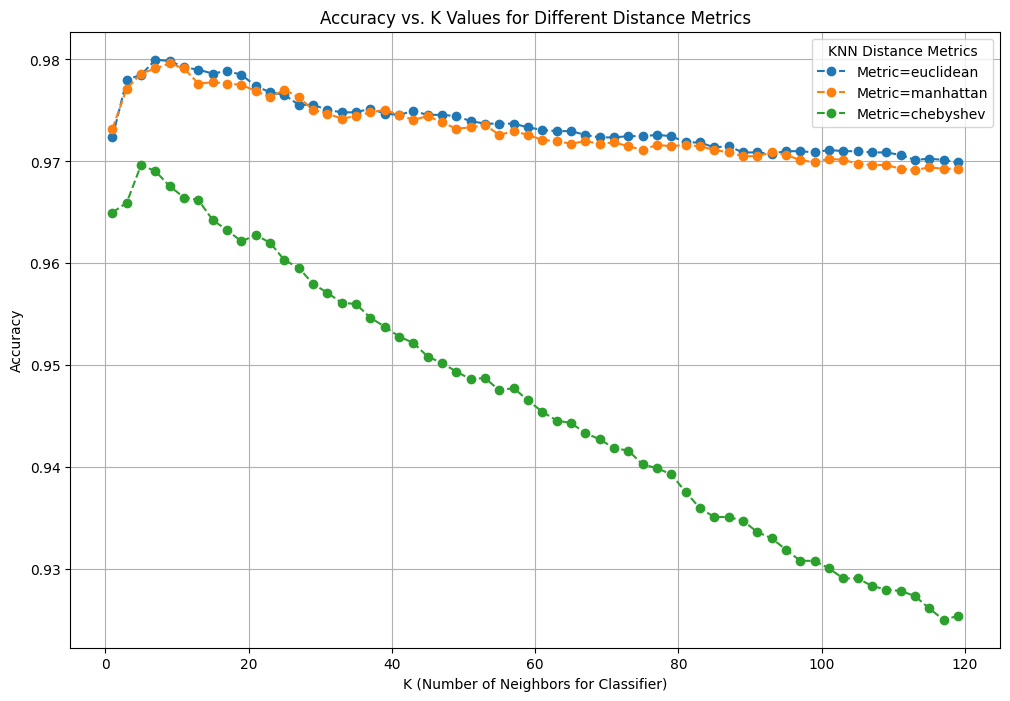

Best parameters: {'knn__metric': 'euclidean', 'knn__n_neighbors': 7}
Best accuracy: 0.9800


In [28]:
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

k_classifier_range = list(range(1, 121, 2))  
metrics = ['euclidean', 'manhattan', 'chebyshev'] 

pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5, metric='nan_euclidean')), 
    ('knn', KNeighborsClassifier()) 
])

param_grid = {
    'knn__n_neighbors': k_classifier_range,  
    'knn__metric': metrics, 
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

grid_results = grid_search.cv_results_

mean_scores = grid_results['mean_test_score']

plt.figure(figsize=(12, 8))
start = 0
for metric in metrics:
    plt.plot(k_classifier_range, mean_scores[start:start + len(k_classifier_range)], marker='o', linestyle='--', label=f'Metric={metric}')
    start += len(k_classifier_range)

plt.title('Accuracy vs. K Values for Different Distance Metrics')
plt.xlabel('K (Number of Neighbors for Classifier)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(title='KNN Distance Metrics')
plt.show()

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters: {best_params}")
print(f"Best accuracy: {best_score:.4f}")


Bootstrapping:   0%|          | 0/10000 [00:00<?, ?iteration/s]

Bootstrapping: 100%|██████████| 10000/10000 [22:57<00:00,  7.26iteration/s]


Bootstrap Mean Accuracy: 0.9795
95% Confidence Interval: [0.9760, 0.9827]


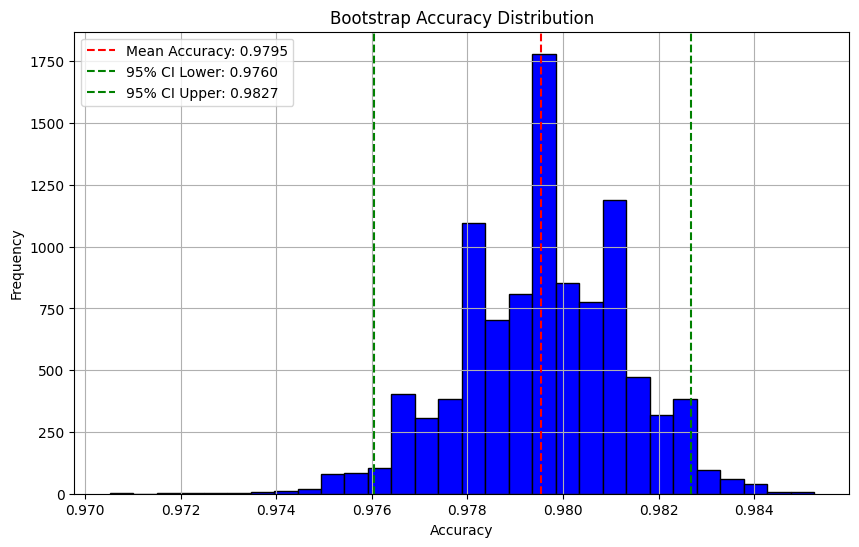

In [57]:
import numpy as np
from sklearn.utils import resample
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tqdm import tqdm

best_imputer_k =5
best_knn_k = best_params['knn__n_neighbors']

pipeline = Pipeline([
    ('imputer', KNNImputer(metric='nan_euclidean', n_neighbors=best_imputer_k)),
    ('knn', KNeighborsClassifier(metric='euclidean', n_neighbors=best_knn_k))
])

n_iterations = 10000
n_size = len(X_train)

bootstrap_accuracies = []

for i in tqdm(range(n_iterations), desc="Bootstrapping", unit="iteration"):
    X_train_resample, y_train_resample = resample(X_train, y_train, n_samples=n_size, random_state=i)
    
    pipeline.fit(X_train_resample, y_train_resample)
    
    y_val_pred = pipeline.predict(X_val)
    acc = accuracy_score(y_val, y_val_pred)
    
    bootstrap_accuracies.append(acc)

mean_accuracy = np.mean(bootstrap_accuracies)
confidence_interval = np.percentile(bootstrap_accuracies, [2.5, 97.5])

print(f"Bootstrap Mean Accuracy: {mean_accuracy:.4f}")
print(f"95% Confidence Interval: [{confidence_interval[0]:.4f}, {confidence_interval[1]:.4f}]")

plt.figure(figsize=(10, 6))
plt.hist(bootstrap_accuracies, bins=30, color='skyblue', edgecolor='black')
plt.title('Bootstrap Accuracy Distribution')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.axvline(mean_accuracy, color='red', linestyle='--', label=f'Mean Accuracy: {mean_accuracy:.4f}')
plt.axvline(confidence_interval[0], color='green', linestyle='--', label=f'95% CI Lower: {confidence_interval[0]:.4f}')
plt.axvline(confidence_interval[1], color='green', linestyle='--', label=f'95% CI Upper: {confidence_interval[1]:.4f}')
plt.legend()
plt.grid(True)
plt.show()


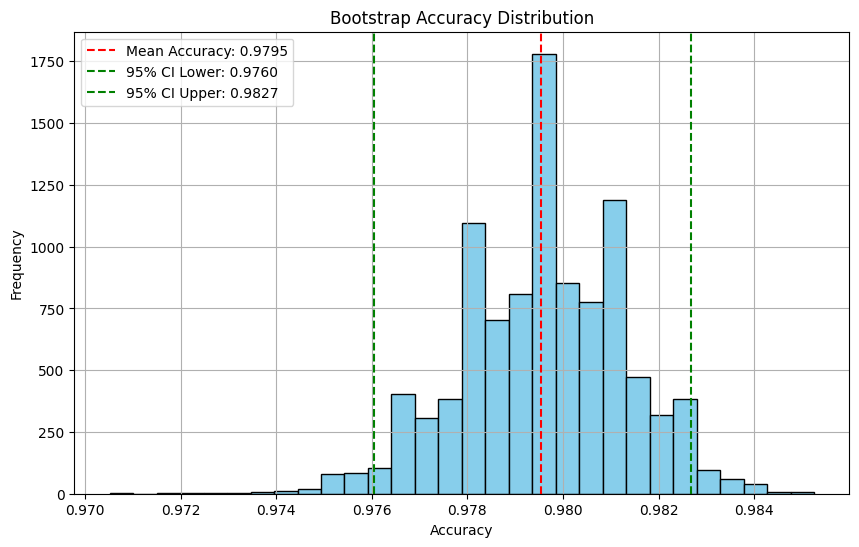

In [58]:
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_accuracies, bins=30, color='skyblue', edgecolor='black')
plt.title('Bootstrap Accuracy Distribution')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.axvline(mean_accuracy, color='red', linestyle='--', label=f'Mean Accuracy: {mean_accuracy:.4f}')
plt.axvline(confidence_interval[0], color='green', linestyle='--', label=f'95% CI Lower: {confidence_interval[0]:.4f}')
plt.axvline(confidence_interval[1], color='green', linestyle='--', label=f'95% CI Upper: {confidence_interval[1]:.4f}')
plt.legend()
plt.grid(True)
plt.show()


Test Accuracy: 0.9786

Confusion Matrix:
[[216   0  25   0   0   0  22]
 [  0 104   0   0   0   0   0]
 [  5   0 316   0   0   0   4]
 [  0   0   0 707   0   0   0]
 [  0   0   0   0 384   0   0]
 [  0   0   0   0   1 403   0]
 [  1   0   0   0   0   0 525]]

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.97      0.82      0.89       263
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.93      0.97      0.95       325
    DERMASON       1.00      1.00      1.00       707
       HOROZ       1.00      1.00      1.00       384
       SEKER       1.00      1.00      1.00       404
        SIRA       0.95      1.00      0.97       526

    accuracy                           0.98      2713
   macro avg       0.98      0.97      0.97      2713
weighted avg       0.98      0.98      0.98      2713



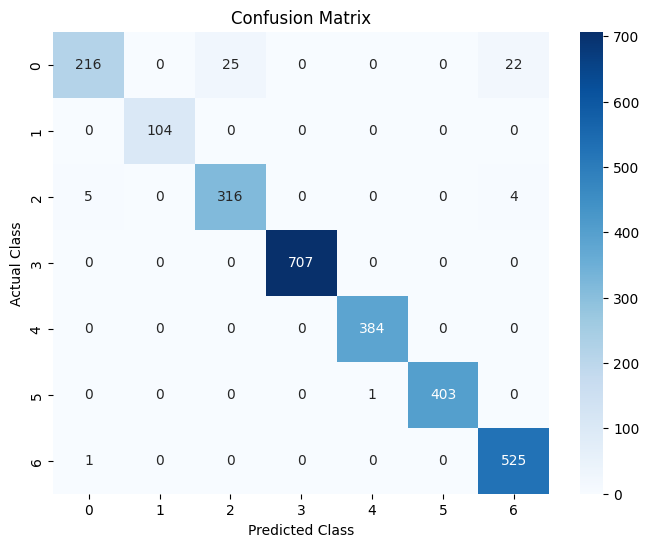

In [35]:
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

best_imputer_k = best_params['imputer__n_neighbors']
best_knn_k = best_params['knn__n_neighbors']

pipeline = Pipeline([
    ('imputer', KNNImputer(metric='nan_euclidean', n_neighbors=best_imputer_k)),
    ('knn', KNeighborsClassifier(metric='euclidean', n_neighbors=best_knn_k))
])

pipeline.fit(X_train, y_train)

y_test_pred = pipeline.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()


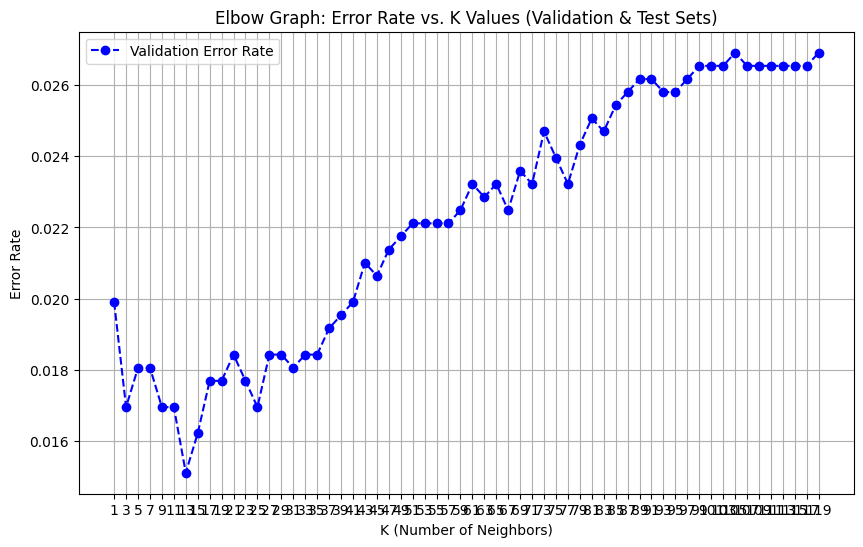

(13, 0.015112421673424303)

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


imputer = KNNImputer(metric='nan_euclidean', n_neighbors=5)

X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)
X_test_imputed = imputer.transform(X_test)

k_values = list(range(1, 121, 2))

val_error_rates = []
test_error_rates = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    
    knn_classifier.fit(X_train_imputed, y_train)
    
    y_val_pred = knn_classifier.predict(X_val_imputed)

    
    val_error_rate = 1 - accuracy_score(y_val, y_val_pred)
    
    val_error_rates.append(val_error_rate)

optimal_k_val = k_values[np.argmin(val_error_rates)]
min_val_error_rate = min(val_error_rates)



plt.figure(figsize=(10, 6))
plt.plot(k_values, val_error_rates, marker='o', linestyle='--', color='b', label='Validation Error Rate')
plt.title('Elbow Graph: Error Rate vs. K Values (Validation & Test Sets)')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Error Rate')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

optimal_k_val, min_val_error_rate


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


X_test_cleaned = X_test_final_combined.dropna()
y_test_cleaned = y_test_final_combined[X_test_cleaned.index]

imputer = KNNImputer(metric='nan_euclidean', n_neighbors=5) 

X_train_imputed = imputer.fit_transform(X_train_final_combined)
X_val_imputed = imputer.transform(X_val_final_combined)

knn_classifier = KNeighborsClassifier(n_neighbors=13)

knn_classifier.fit(X_train_imputed, y_train_final_combined)

y_test_pred = knn_classifier.predict(X_test_cleaned)

test_accuracy = accuracy_score(y_test_cleaned, y_test_pred)
test_error_rate = 1 - test_accuracy

print(f"Test Accuracy: {test_accuracy}")
print(f"Test Error Rate: {test_error_rate}")


Test Accuracy: 0.9797272392185772
Test Error Rate: 0.020272760781422816


c:\Users\Chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


c:\Users\Chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


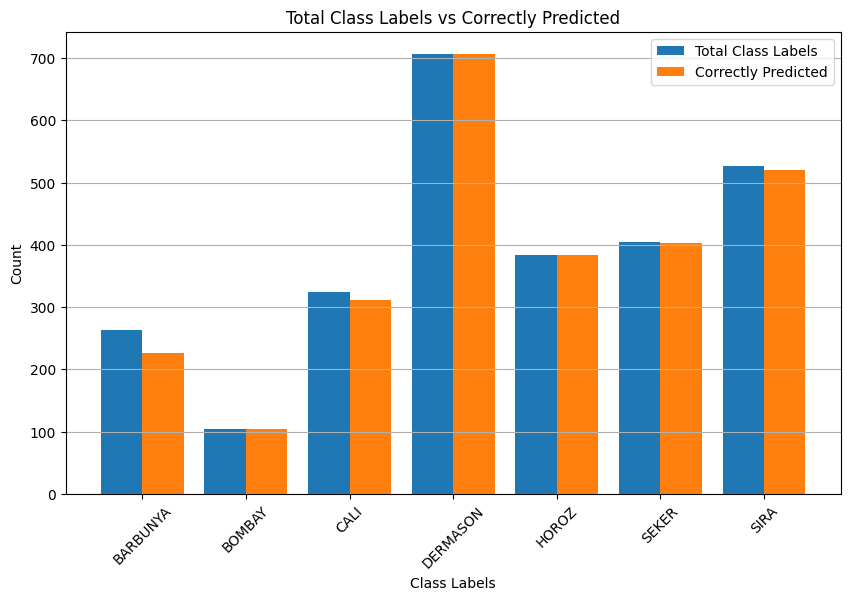

Test Accuracy: 0.9797
Test Error Rate: 0.0203


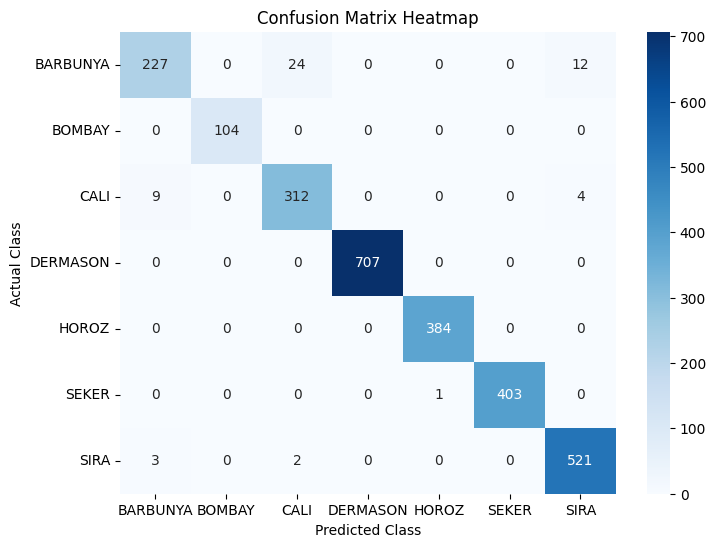


Recall Rates:
Recall for class BARBUNYA: 0.8631
Recall for class BOMBAY: 1.0000
Recall for class CALI: 0.9600
Recall for class DERMASON: 1.0000
Recall for class HOROZ: 1.0000
Recall for class SEKER: 0.9975
Recall for class SIRA: 0.9905


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

X_test_cleaned = X_test_final_combined.dropna()
y_test_cleaned = y_test_final_combined[X_test_cleaned.index]

imputer = KNNImputer(metric='nan_euclidean', n_neighbors=5)
X_train_imputed = imputer.fit_transform(X_train_final_combined)
X_val_imputed = imputer.transform(X_val_final_combined)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_final_combined)
y_test_encoded = label_encoder.transform(y_test_cleaned)

knn_classifier = KNeighborsClassifier(n_neighbors=13)
knn_classifier.fit(X_train_imputed, y_train_encoded)

y_test_pred_encoded = knn_classifier.predict(X_test_cleaned)

test_accuracy = accuracy_score(y_test_encoded, y_test_pred_encoded)
test_error_rate = 1 - test_accuracy

conf_matrix = confusion_matrix(y_test_encoded, y_test_pred_encoded)

class_labels = label_encoder.classes_
total_per_class = np.bincount(y_test_encoded)
correctly_predicted_per_class = np.diag(conf_matrix)

bar_width = 0.4
x = np.arange(len(class_labels))

plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, total_per_class, width=bar_width, label='Total Class Labels')
plt.bar(x + bar_width/2, correctly_predicted_per_class, width=bar_width, label='Correctly Predicted')

plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Total Class Labels vs Correctly Predicted')
plt.xticks(x, class_labels, rotation=45)
plt.legend()
plt.grid(axis='y')
plt.show()

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Error Rate: {test_error_rate:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

recall_per_class = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)

print("\nRecall Rates:")
for label, recall in zip(class_labels, recall_per_class):
    print(f"Recall for class {label}: {recall:.4f}")
